In [1]:
%load_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
import torchvision
from torch.utils.data import DataLoader
from pathlib import Path
import sys
sys.path.append(str(Path('../../').resolve()))

In [72]:
%autoreload
import v4.pytorch_unet.unet as unet
from v4.pytorch_unet.learner import UNetLearner
from v4.pytorch_unet.unet_dataset import UNetDataset

[autoreload of v4.pytorch_unet.learner failed: Traceback (most recent call last):
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    frame = next(frame_nfo.frame for frame_nfo in inspect.stack()

In [73]:
#mnist = datasets.MNIST(Path('./mnist'), download=True, transform=torchvision.transforms.Compose([
#                               torchvision.transforms.ToTensor(),
#                               torchvision.transforms.Normalize(
#                                 (0.1307,), (0.3081,))
#                             ]))
#train_loader = torch.utils.data.DataLoader(mnist, batch_size=4000, shuffle=True, num_workers=4, pin_memory=True)

In [74]:
train_dataset = UNetDataset(root_dir=Path('simple_dataset'), part='train')
valid_dataset = UNetDataset(root_dir=Path('simple_dataset'), part='valid')
train_loader = DataLoader(train_dataset)

In [75]:
model = unet.ResNetUnet(in_channels=train_dataset.image_channels, in_size=train_dataset.item_size, n_classes=len(train_dataset.classes), depth=4)
#model.cuda();

In [76]:
%autoreload
from v4.pytorch_unet.learner import UNetLearner

In [77]:
learner = UNetLearner(model, train_loader, valid_loader=None, cuda=True)

In [78]:
train_dataset[0][1].shape

torch.Size([300, 300])

In [85]:
learner.train(n_epochs=100, lr=3e-4, momentum=0.9)

Epoch 41 train loss: 0.04242490865290165 valid loss: 0
Epoch 42 train loss: 0.042169467980662984 valid loss: 0
Epoch 43 train loss: 0.041986419322590035 valid loss: 0
Epoch 44 train loss: 0.042116077492634456 valid loss: 0
Epoch 45 train loss: 0.041788321609298386 valid loss: 0
Epoch 46 train loss: 0.04187472735842069 valid loss: 0
Epoch 47 train loss: 0.04175767314930757 valid loss: 0
Epoch 48 train loss: 0.04152465915928284 valid loss: 0
Epoch 49 train loss: 0.04141663480550051 valid loss: 0
Epoch 50 train loss: 0.041453417080144085 valid loss: 0
Epoch 51 train loss: 0.04139962966243426 valid loss: 0
Epoch 52 train loss: 0.04146893403182427 valid loss: 0
Epoch 53 train loss: 0.041382722370326516 valid loss: 0
Epoch 54 train loss: 0.041002875690658885 valid loss: 0
Epoch 55 train loss: 0.04086430631577968 valid loss: 0
Epoch 56 train loss: 0.0409476725384593 valid loss: 0
Epoch 57 train loss: 0.04089390952140093 valid loss: 0
Epoch 58 train loss: 0.040739001519978044 valid loss: 0
Epo

ITEM torch.Size([1, 1, 300, 300])
ITEM torch.Size([1, 1, 300, 300])


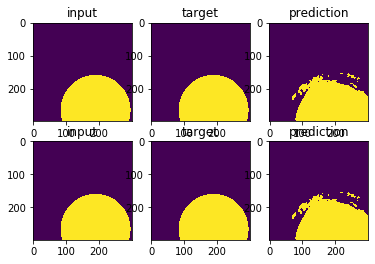

In [84]:
learner.show_train_results(2)